# Proyecto: 
## **Forbes Richest Athletes 1990-2020 Analysis**

#### Alumnos: 
- Daniel Eduardo López Martínez
- Raziel Gutiérrez Moncayo
- Sabrina Contreras


El dataset a analizar corresponde a un ranking año con año desde 1990 hasta 2020 sobre los deportistas más ricos según la revista Forbes.

### 1. Carga de librerías

In [206]:
# Carga de las librerías a emplear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt

In [207]:
%matplotlib inline
mpl.style.use(['ggplot']) # For ggplot-like style 

### 2. Carga del dataset

In [208]:
# Cargado del data set a través de pandas
# El dataset se encuentra en la carpeta "data"
df = pd.read_csv('data\Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020) (3).csv')

### 3. Exploración del dataset

In [209]:
df.head(10) # Primeros 10 datos 

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [210]:
df.tail(10) # Últimos 10 datos

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
291,292,Roger Federer,Switzerland,1,5,Tennis,2020,106.3
292,293,Cristiano Ronaldo,Portugal,2,2,Soccer,2020,105.0
293,294,Lionel Messi,Argentina,3,1,Soccer,2020,104.0
294,295,Neymar,Brazil,4,3,Soccer,2020,95.5
295,296,LeBron James,USA,5,8,Basketball,2020,88.2
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


Del resultado anterior se puede concluir que el campo "Previous Year Rank" contiene valores nulos, mientras que los demás campos no.

In [212]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


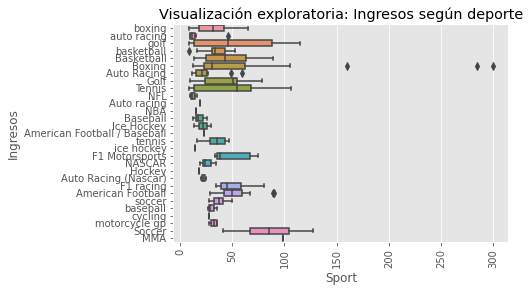

In [213]:
sns.boxplot(data= df, y='Sport', x='earnings ($ million)')
plt.title('Visualización exploratoria: Ingresos según deporte')
plt.xlabel('Sport')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

De la figura anterior se observa que los datos de los nombres de los deportes están sucios. Pues hay algunas en minúsculas y otros capitalizados, así como distintos nombres para un mismo deporte.

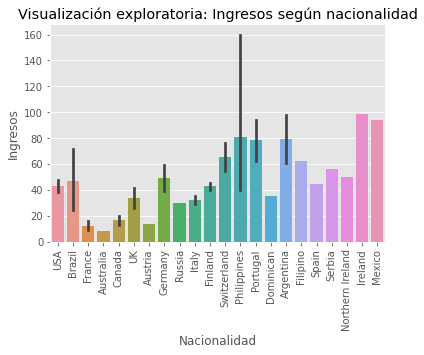

In [214]:
sns.barplot(data= df, x='Nationality', y='earnings ($ million)')
plt.title('Visualización exploratoria: Ingresos según nacionalidad')
plt.xlabel('Nacionalidad')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

De la figura anterior se observa que los datos de las nacionalidades se encuentran limpios y son consistentes.

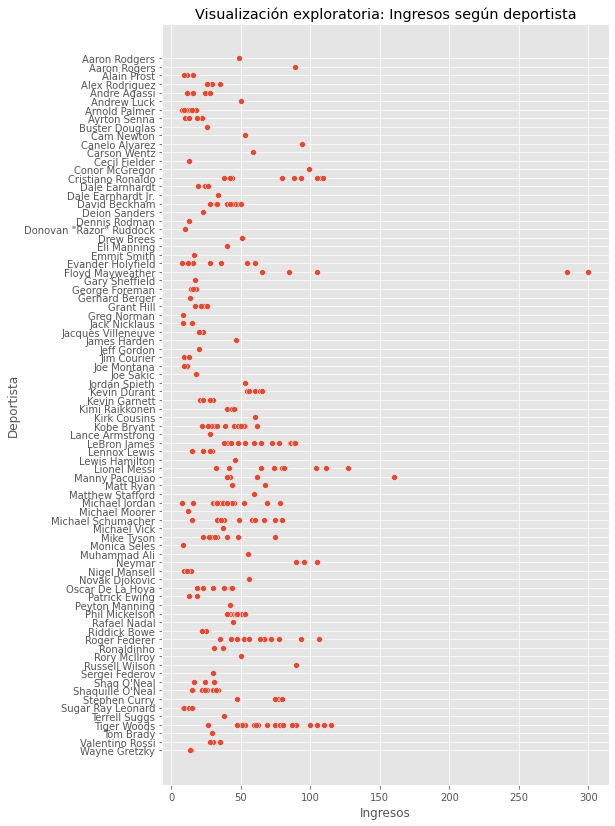

In [215]:
plt.figure(figsize = (8,14))
sns.scatterplot(data= df.sort_values('Name'), y='Name', x='earnings ($ million)')
plt.title('Visualización exploratoria: Ingresos según deportista')
plt.xlabel('Ingresos')
plt.ylabel('Deportista')
plt.show()

De lo anterior se visualizan inconsistencias en los datos de Aaron Rodgers, Dale Earnhardt y Shaquille O'Neill

### 4. Limpieza del dataset

In [216]:
# Para los propósitos del presente análisis, se ajustarán las observaciones de la columna "Previous Year Rank" del dataset, ya que cuenta con valores nulos
#como se indicó anteriormente. 
df['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [217]:
# Limpiamos las inconsistencias en la columna: Previous Year Rank
df['Previous Year Rank'] = df['Previous Year Rank'].replace(['>40','>10','>14','>20','>30','>100'],['40','10','14','20','30','100']) #Eliminamos signo de >
df['Previous Year Rank'] = df['Previous Year Rank'].replace(["none","?","??"],"not ranked") #Reemplazamos los datos none por "not ranked"
df.fillna({'Previous Year Rank':'not ranked'},inplace=True) #Llenamos Nan por "not ranked"
df['Previous Year Rank'].unique()

array(['not ranked', '8', '1', '30', '4', '5', '12', '6', '3', '9', '17',
       '13', '10', '40', '19', '7', '11', '22', '20', '38', '2', '15',
       '14', '26', '18', '24', '21', '100'], dtype=object)

In [218]:
# Renombramos el nombre de algunas columnas por nombres más convenientes
df.rename(columns = {'S.NO':'Index', 'Current Rank':'Actual Rank','Previous Year Rank': 'Previous Rank', 'earnings ($ million)': 'Earnings ($M)'}, inplace = True)
df.head()

,Index,Name,Nationality,Actual Rank,Previous Rank,Sport,Year,Earnings ($M)
0,1,Mike Tyson,USA,1,not ranked,boxing,1990,28.6
1,2,Buster Douglas,USA,2,not ranked,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,not ranked,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,not ranked,auto racing,1990,10.0
4,5,Alain Prost,France,5,not ranked,auto racing,1990,9.0


In [219]:
# Finalmente se procede a reajustar el index del dataframe a Index
df.set_index('Index', inplace = True)
df.head()

,Name,Nationality,Actual Rank,Previous Rank,Sport,Year,Earnings ($M)
Index,,,,,,,
1,Mike Tyson,USA,1,not ranked,boxing,1990,28.6
2,Buster Douglas,USA,2,not ranked,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,not ranked,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,not ranked,auto racing,1990,10.0
5,Alain Prost,France,5,not ranked,auto racing,1990,9.0


In [220]:
# Convertimos el campo de Sport a formato de títulos para que haya consistencia entre mayúsculas y minusculas
df['Sport'] = df['Sport'].str.title()
df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'Nfl',
       'Nba', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'F1 Motorsports', 'Nascar', 'Hockey', 'Auto Racing (Nascar)',
       'F1 Racing', 'American Football', 'Soccer', 'Cycling',
       'Motorcycle Gp', 'Mma'], dtype=object)

In [221]:
# Se observa que hay inconsistencias entre los nombres de los deportes, por lo que se procede a limpiar los datos con nombres más generales
df['Sport'] = df['Sport'].replace(['Auto Racing (Nascar)','Nascar','F1 Racing', 'F1 Motorsports'],'Auto Racing')
df['Sport'] = df['Sport'].replace('Nba','Basketball')
df['Sport'] = df['Sport'].replace(['Nfl','American Football / Baseball'],'American Football')
df['Sport'] = df['Sport'].replace('Ice Hockey','Hockey')
df['Sport'] = df['Sport'].replace('Motorcycle Gp','Motorcycle GP')
df['Sport'] = df['Sport'].replace('Mma','MMA')
df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Hockey', 'Soccer', 'Cycling',
       'Motorcycle GP', 'MMA'], dtype=object)

In [222]:
# Posteriormente limpiamos las inconsistencias en los nombres de algunos deportistas

In [223]:
df['Name'] = df['Name'].replace('Aaron Rogers','Aaron Rodgers')
df['Name'] = df['Name'].replace('Dale Earnhardt Jr.','Dale Earnhardt')
df['Name'] = df['Name'].replace("Shaq O'Neill","Shaquille O'Neill")
df['Name'].unique()

array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

In [224]:
# Ahora el dataset está limpio y listo para su análisis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1 to 301
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           301 non-null    object 
 1   Nationality    301 non-null    object 
 2   Actual Rank    301 non-null    int64  
 3   Previous Rank  301 non-null    object 
 4   Sport          301 non-null    object 
 5   Year           301 non-null    int64  
 6   Earnings ($M)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


### 5. Análisis y Visualización del Dataset

In [225]:
#Análisis estadístico descriptivo
df.describe()

,Actual Rank,Year,Earnings ($M)
count,301.000000,301.000000,301.000000
mean,5.448505,2005.122924,45.516279
std,2.850995,9.063563,33.525337
min,1.000000,1990.000000,8.100000
25%,3.000000,1997.000000,24.000000
50%,5.000000,2005.000000,39.000000
75%,8.000000,2013.000000,59.400000
max,10.000000,2020.000000,300.000000


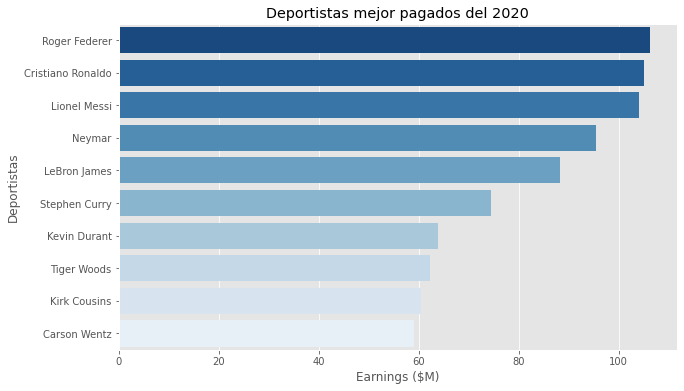

In [226]:
# Deportistas mejor pagados de 2020
df_2020 = df[df['Year'] == 2020]

plt.figure(figsize = (10,6))
sns.barplot(data= df_2020, x='Earnings ($M)', y='Name', palette='Blues_r')
plt.title('Deportistas mejor pagados del 2020')
plt.xlabel('Earnings ($M)')
plt.ylabel('Deportistas')
plt.show()

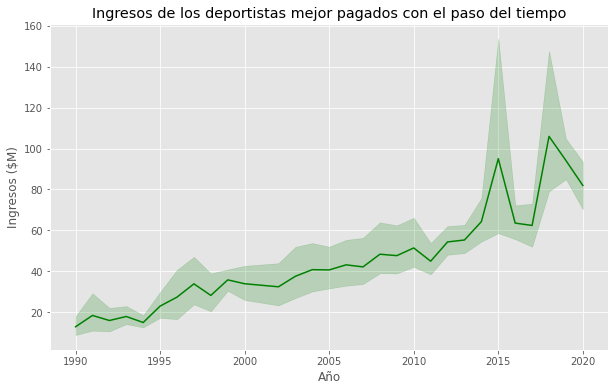

In [227]:
# Ingresos de los deportistas mejor pagados con el paso del tiempo
plt.figure(figsize = (10,6))
sns.lineplot(data= df, x='Year', y='Earnings ($M)', color = "Green")
plt.title('Ingresos de los deportistas mejor pagados con el paso del tiempo')
plt.xlabel('Año') 
plt.ylabel('Ingresos ($M)')
plt.show()

De la figura anterior se observa que los ingresos han crecido a lo largo del tiempo.

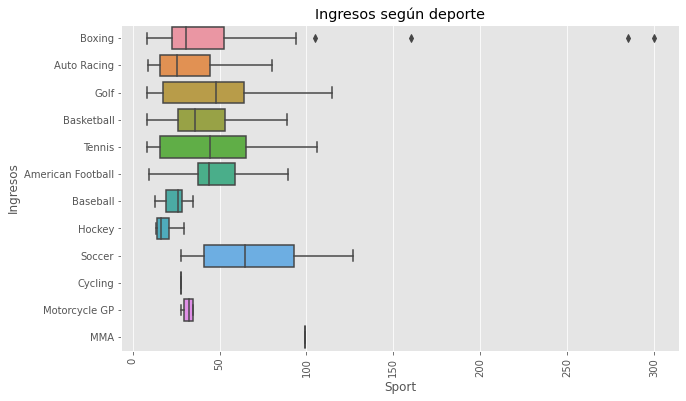

In [228]:
# Ingresos por deporte
plt.figure(figsize = (10,6))
sns.boxplot(data= df, y='Sport', x='Earnings ($M)')
plt.title('Ingresos según deporte')
plt.xlabel('Sport')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

De la figura anterior se observa que los jugadores de soccer mejores pagados suelen disfrutar de salarios promedio más altos.

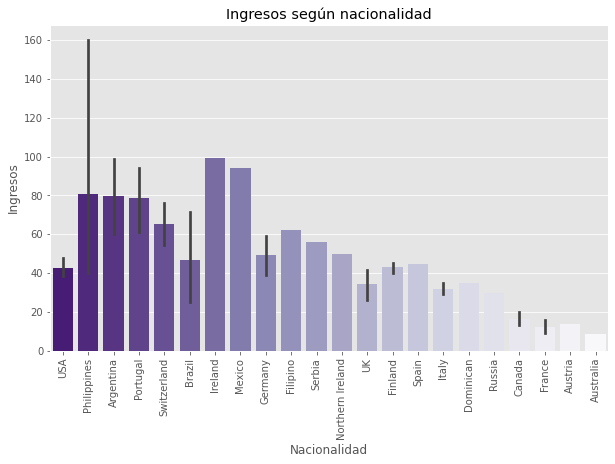

In [229]:
# Ingresos según nacionalidad 
plt.figure(figsize = (10,6))
sns.barplot(data= df.sort_values('Earnings ($M)',ascending=False), x='Nationality', y='Earnings ($M)', palette='Purples_r')
plt.title('Ingresos según nacionalidad')
plt.xlabel('Nacionalidad')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

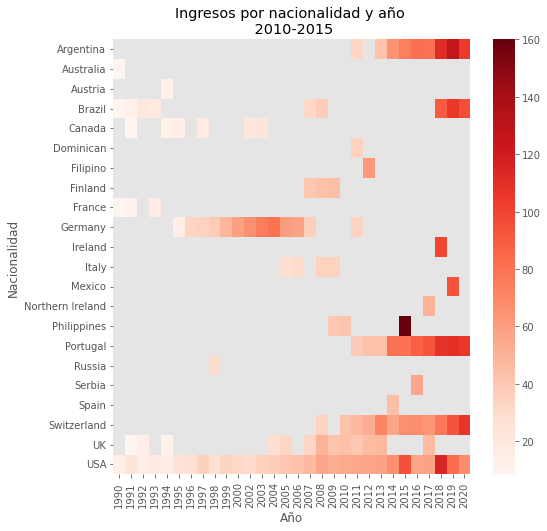

In [230]:
# Ingresos por nacionalidad y año
heatmap = df.pivot_table(index='Nationality', columns='Year', values ='Earnings ($M)')

plt.figure(figsize = (8,8))
sns.heatmap(data = heatmap, cmap="Reds")
plt.title('Ingresos por nacionalidad y año \n 2010-2015')
plt.xlabel('Año')
plt.yticks(rotation = 0)
plt.ylabel('Nacionalidad')
plt.show()


In [231]:
df.to_csv("Data\Forbes Richest Atheletes (1990-2020) (Clean).csv")

### 6. Conclusiones e insights